In [1]:
from nltk.util import pr 
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report





In [2]:
df = pd.read_csv('twitter.csv')

In [3]:
df.head()

,tweet_no,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df['labels'] = df['class'].map({0:'Hate Speech', 1:'Offensive Language', 2:'No Hate and Offensive'})

In [5]:
df = df[['tweet','labels']]

In [6]:
import re
import nltk
nltk.download('stopwords')

stemmer = nltk.SnowballStemmer('english')

from nltk.corpus import stopwords
import string
stopword = stopwords.words('english')


def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df['tweet'] = df['tweet'].apply(clean)

<>:14: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:19: SyntaxWarning: invalid escape sequence '\w'
<>:14: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:19: SyntaxWarning: invalid escape sequence '\w'
C:\Users\pc\AppData\Local\Temp\ipykernel_15384\1655894988.py:14: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\pc\AppData\Local\Temp\ipykernel_15384\1655894988.py:15: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\pc\AppData\Local\Temp\ipykernel_15384\1655894988.py:19: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['tweet'].head()

0     rt mayasolov woman shouldnt complain clean ho...
1     rt  boy dat coldtyga dwn bad cuffin dat hoe  ...
2     rt urkindofbrand dawg rt  ever fuck bitch sta...
3               rt cganderson vivabas look like tranni
4     rt shenikarobert shit hear might true might f...
Name: tweet, dtype: object

In [8]:
x = df['tweet']
y = df['labels']

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)


In [10]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_split=10,min_samples_leaf=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8893507763785303

In [11]:

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=10, min_samples_leaf=5)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"F1-Score: {f1:.2f}")

# Classification Report (optional for more detailed metrics)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1-Score: 0.88

Classification Report:
                       precision    recall  f1-score   support

          Hate Speech       0.48      0.32      0.39       465
No Hate and Offensive       0.85      0.80      0.82      1379
   Offensive Language       0.92      0.95      0.93      6335

             accuracy                           0.89      8179
            macro avg       0.75      0.69      0.71      8179
         weighted avg       0.88      0.89      0.88      8179



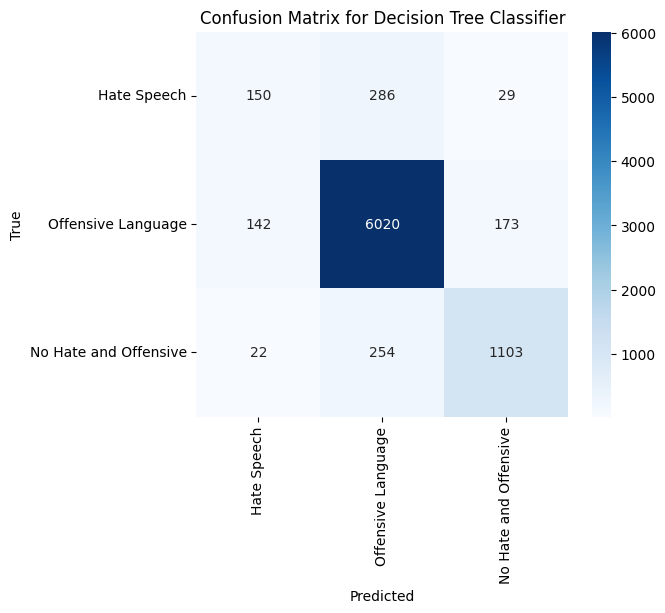

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))  # Now plt.figure will work correctly
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"],
            yticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


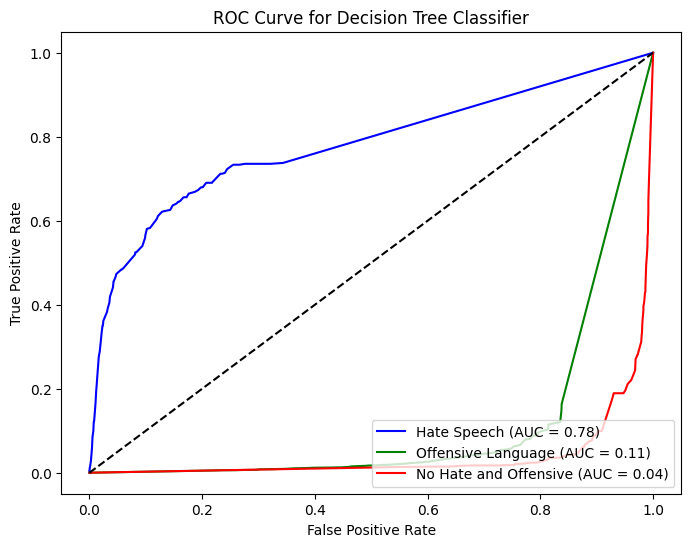

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for each class
y_pred_proba = clf.predict_proba(X_test)  # Use predict_proba to get probabilities

# Binarize y_test for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Compute ROC curve and ROC AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_binarized.shape[1]):  # For each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
classes = ["Hate Speech", "Offensive Language", "No Hate and Offensive"]
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend(loc="lower right")
plt.show()


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the KNN Classifier
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"F1-Score: {f1:.2f}")

# Classification Report (optional for more detailed metrics)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1-Score: 0.85

Classification Report:
                       precision    recall  f1-score   support

          Hate Speech       0.38      0.33      0.35       465
No Hate and Offensive       0.72      0.71      0.71      1379
   Offensive Language       0.91      0.92      0.91      6335

             accuracy                           0.85      8179
            macro avg       0.67      0.65      0.66      8179
         weighted avg       0.84      0.85      0.85      8179



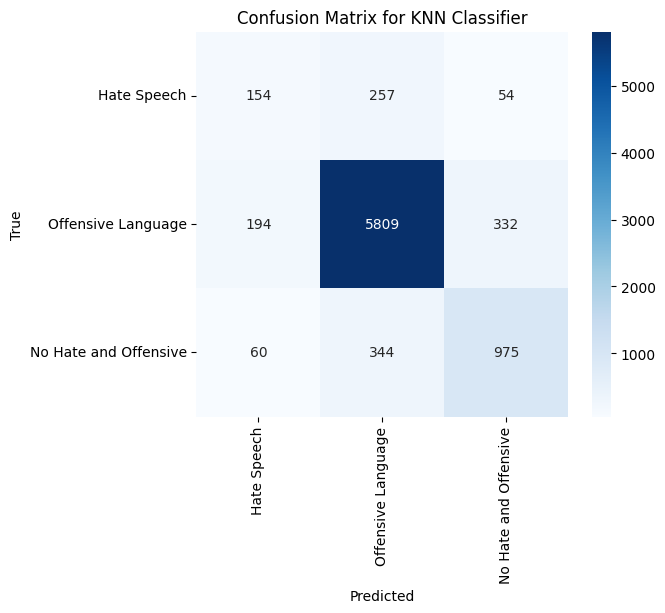

In [16]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))  # Now plt.figure will work correctly
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"],
            yticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

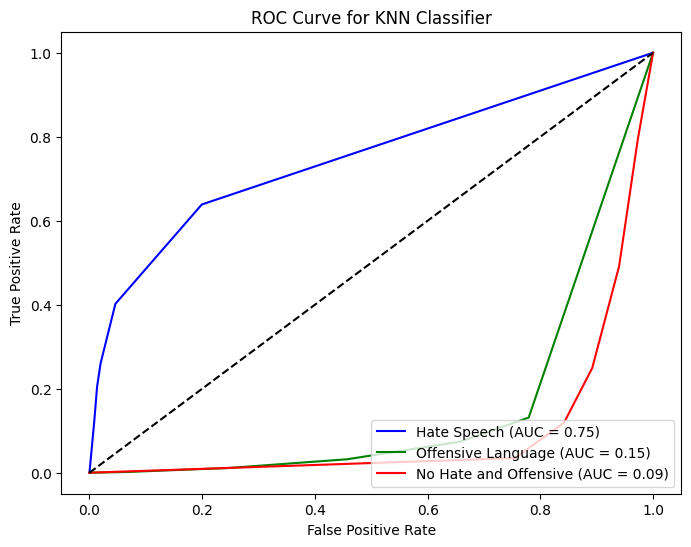

In [17]:
# Get probabilities for each class
y_pred_proba = knn.predict_proba(X_test)  # Use predict_proba to get probabilities

# Binarize y_test for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Compute ROC curve and ROC AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_binarized.shape[1]):  # For each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
classes = ["Hate Speech", "Offensive Language", "No Hate and Offensive"]
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=10, min_samples_leaf=5)

# Train the Random Forest Classifier
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
print(f"F1-Score: {f1:.2f}")

# Classification Report (optional for more detailed metrics)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.86
Precision: 0.81
Recall: 0.86


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1-Score: 0.82

Classification Report:
                       precision    recall  f1-score   support

          Hate Speech       0.00      0.00      0.00       465
No Hate and Offensive       0.92      0.51      0.66      1379
   Offensive Language       0.85      0.99      0.92      6335

             accuracy                           0.86      8179
            macro avg       0.59      0.50      0.52      8179
         weighted avg       0.81      0.86      0.82      8179



c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


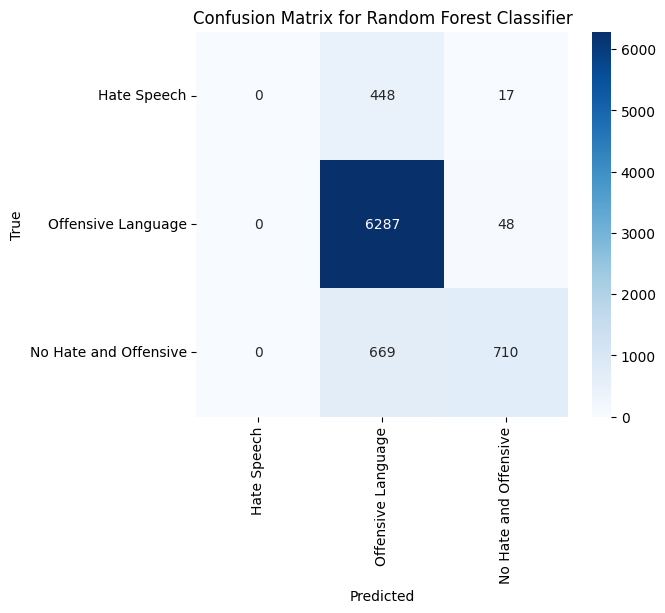

In [19]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))  # Now plt.figure will work correctly
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"],
            yticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



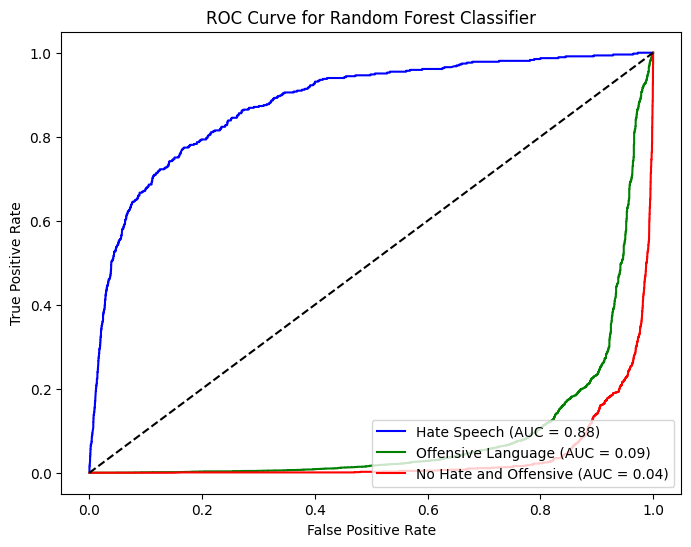

In [20]:
# Get probabilities for each class
y_pred_proba = rf.predict_proba(X_test)  # Use predict_proba to get probabilities

# Binarize y_test for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Compute ROC curve and ROC AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test_binarized.shape[1]):  # For each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
classes = ["Hate Speech", "Offensive Language", "No Hate and Offensive"]
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


In [21]:
import pickle
with open('model.pkl','wb+') as f:
    pickle.dump(clf,f)


with open('cv.pkl','wb+') as f:
    pickle.dump(cv,f)

Accuracy: 0.77
Precision: 0.60
Recall: 0.77
F1-Score: 0.68

Classification Report:


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

                       precision    recall  f1-score   support

          Hate Speech       0.00      0.00      0.00       465
No Hate and Offensive       0.00      0.00      0.00      1379
   Offensive Language       0.77      1.00      0.87      6335

             accuracy                           0.77      8179
            macro avg       0.26      0.33      0.29      8179
         weighted avg       0.60      0.77      0.68      8179



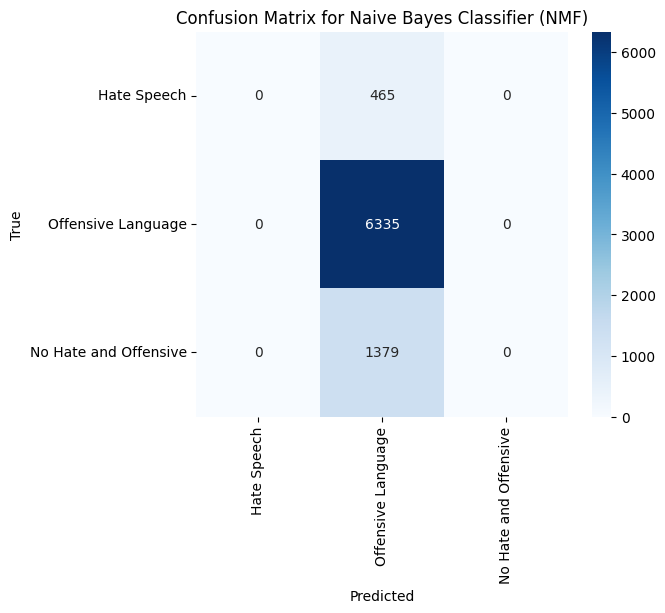

In [22]:
from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB


# Apply NMF (Non-Negative Matrix Factorization) to reduce dimensionality
nmf = NMF(n_components=100)  # You can adjust the number of components
X_train_nmf = nmf.fit_transform(X_train)  # Apply NMF to the training data
X_test_nmf = nmf.transform(X_test)  # Apply the same transformation to the test data

# Train the Naive Bayes Classifier using MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_nmf, y_train)

# Predictions
y_pred = nb.predict(X_test_nmf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Other metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"],
            yticklabels=["Hate Speech", "Offensive Language", "No Hate and Offensive"])
plt.title("Confusion Matrix for Naive Bayes Classifier (NMF)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
